## Basic Usage


### Plotting Class Inheritance 

In [1]:
from inheritance_explorer import ClassGraphTree
import numpy as np

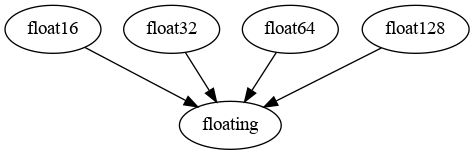

In [2]:
base_class = np.floating
cgt = ClassGraphTree(base_class)
cgt.show_graph()

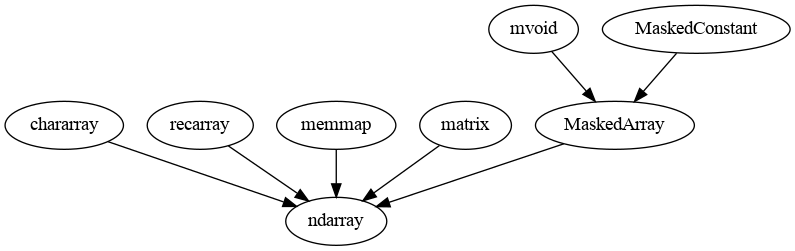

In [3]:
base_class = np.ndarray
cgt = ClassGraphTree(base_class)
cgt.show_graph()

### Additional function tracking 

If you supply a function name via the `funcname` argument, then that function will be tracked as the classes are traversed. Any child class that overrides the function will be flagged and the actual source code of the function will be stored. After traversal, a code-similarity matrix between all classes that over-ride the function. 

This is best illustrated with an example: 

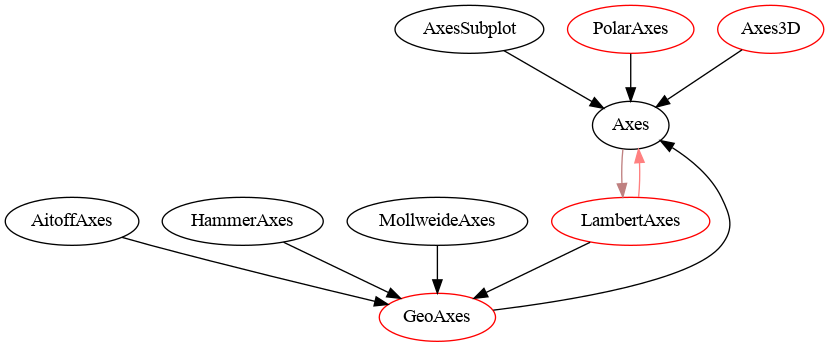

In [4]:
from matplotlib.axes import Axes

cgt = ClassGraphTree(Axes, funcname='clear')
cgt.show_graph()

here, we're mapping out the `matplotlib` `Axes` class and tracking the `clear()` function. Any methods after the main parent that override `clear` are highlighted in red. Any classes that override **and** look similar (see below) are connected with additional arrows (red and brown). 

In the interactive graph, the same information is displayed, with overriding classes as purple nodes nad similar nodes connected by blue lines:

We display the actual similarity coefficient matrix used to identify similar nodes:

({0: 'Axes', 1: 'GeoAxes', 2: 'LambertAxes', 3: 'PolarAxes', 4: 'Axes3D'},
 <AxesSubplot: >)

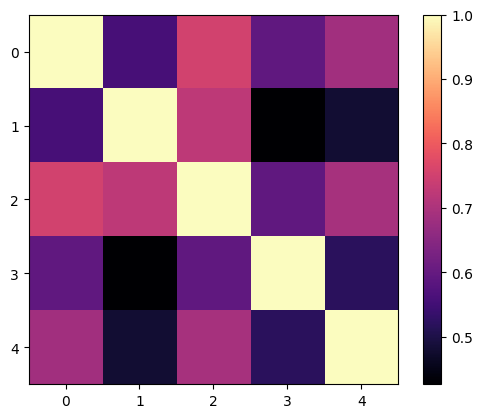

In [5]:
cgt.plot_similarity()

The above plot is the code inter-comparison between every class that overrides `clear()`. A value of 1 is identical (the diagonal of this plot will always be 1) and a value of 0 is no similarity. 

**Furthermore**, the actual source code is recorded during traversal, which you can inspect inividually:

In [6]:
from IPython.display import Code
Code(cgt.get_source_code('PolarAxes'), language="python")

def clear(self):
    # docstring inherited
    super().clear()

    self.title.set_y(1.05)

    start = self.spines.get('start', None)
    if start:
        start.set_visible(False)
    end = self.spines.get('end', None)
    if end:
        end.set_visible(False)
    self.set_xlim(0.0, 2 * np.pi)

    self.grid(mpl.rcParams['polaraxes.grid'])
    inner = self.spines.get('inner', None)
    if inner:
        inner.set_visible(False)

    self.set_rorigin(None)
    self.set_theta_offset(self._default_theta_offset)
    self.set_theta_direction(self._default_theta_direction)

or as a group:

In [7]:
src_dict = cgt.get_multiple_source_code('LambertAxes', 'GeoAxes', 'Axes')

Code(src_dict['Axes'], language="python")

def clear(self):
    """Clear the Axes."""
    # Act as an alias, or as the superclass implementation depending on the
    # subclass implementation.
    if self._subclass_uses_cla:
        self.cla()
    else:
        self.__clear()

In [8]:
Code(src_dict['GeoAxes'], language="python")

def clear(self):
    # docstring inherited
    super().clear()

    self.set_longitude_grid(30)
    self.set_latitude_grid(15)
    self.set_longitude_grid_ends(75)
    self.xaxis.set_minor_locator(NullLocator())
    self.yaxis.set_minor_locator(NullLocator())
    self.xaxis.set_ticks_position('none')
    self.yaxis.set_ticks_position('none')
    self.yaxis.set_tick_params(label1On=True)
    # Why do we need to turn on yaxis tick labels, but
    # xaxis tick labels are already on?

    self.grid(mpl.rcParams['axes.grid'])

    Axes.set_xlim(self, -np.pi, np.pi)
    Axes.set_ylim(self, -np.pi / 2.0, np.pi / 2.0)

In [9]:
Code(src_dict['LambertAxes'], language="python")

def clear(self):
    # docstring inherited
    super().clear()
    self.yaxis.set_major_formatter(NullFormatter())

### Interactive Graph

In a jupyter notebook, you can construct a pyvis interactive graph from a `ClassGraphTree` instance, `cgt` with:

```python
graph = cgt.build_interactive_graph(width="400px",
                                    height="400px",
                                    bgcolor='#222222',
                                    font_color='white') # constructs a pyvis interactive graph
graph.show('_tmp.html')  # render the pyvis interactive graph here!
```


### Command Line Usage

You can also build plots from the command line! 

ADD SOME EXAMPLES HERE!!!!!!!!!!!!!!

### Limitations

Note that while the class inheritance structures **should** be well behaved for most code bases, the source code comparison is limited by the type limitations of the underlying `inspect` library. 

The `sum` method for numpy arrays, for example, is a `method_descriptor`:

In [10]:
type(np.ndarray.sum)

method_descriptor

which `inspect.get_source` cannot handle. So if we try to track `sum` across the class structure with:

```python
base_class = np.ndarray
cgt = ClassGraphTree(base_class, funcname = 'sum')
```

we will get a `TypeError` similar to the following:

```
--> 677 raise TypeError('module, class, method, function, traceback, frame, or '
    678                 'code object was expected, got {}'.format(
    679                 type(object).__name__))

TypeError: module, class, method, function, traceback, frame, or code object was expected, got method_descriptor
```